# CS F415 Data Mining - Home Loan Approval

### Problem Statement & Data Set
Suppose a Finance Company offers home loans across urban, semi-urban,
and rural areas. The loan approval process typically spans 1 week to 1 month
due to extensive customer research.To streamline this, we'll employ Data
Mining techniques to automate and expedite loan approvals.

### About the dataset
The loan application data set includes various columns that provide
information on the applicant and the loan, such as Loan ID, Gender, Marital
Status,Dependents, Education, Self-Employment status, Applicant Income,
Co-Applicant Income, Loan Amount, Loan Amount Term, Credit History, and
Property Area.

## Data Preprocessing
### 1. Importing Dependencies and Datasets

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#### Data
We have two csv files: train & test.

Train file contains all independent variables and target variables which'll be used to train the model. (i.e. train csv has loan_status column, but test csv doesn't)

Test file has independent variables, but not the target variables. This model will predict test variables for the test data.

In [14]:
train=pd.read_csv('./datasets/loan_sanction_train.csv')
test=pd.read_csv('./datasets/loan_sanction_test.csv')

In [15]:
print(train.shape)
train.head(10)

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


#### Checking for duplicates and missing values

In [16]:
print(f"No. of duplicates: {train.duplicated().sum()}")
train.isnull().sum()

No. of duplicates: 0


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* We have no duplicates, but have several missing values

In [17]:
train.select_dtypes('object').nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64


* Since the value of Loan_Id is unique for each row, we can remove Loan_ID as it won't be useful in model training.

In [18]:
train.drop(columns=['Loan_ID'],inplace=True)

In [19]:
train.describe(include="number") # describing numerical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
desc = train.describe(exclude="number") # describing categorical data

for col in desc.columns:
    top_category = desc.loc['top', col]
    percentage = ((train[col] == top_category).mean()*100).round(2)
    desc.loc['top_percentage', col] = percentage

desc

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422
top_percentage,79.64,64.82,56.19,78.18,81.43,37.95,68.73


* There are more Male(79.64%) applicants than Female.
* Frequency of Married(64.82%) applicants is more.
* There are more Graduate(78.18%) applicants.

#### Data Visualization

##### Checking if Applicant Income is Normally Distributed

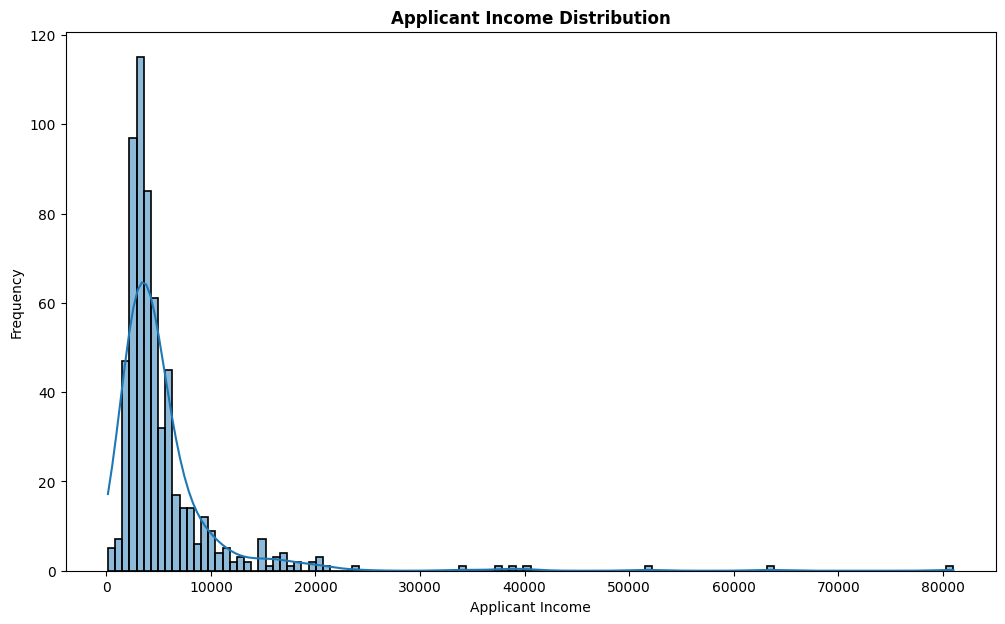

In [48]:

plt.figure(figsize=(12, 7))
sns.histplot(data=train, x="ApplicantIncome", kde=True,edgecolor='black', linewidth=1.2)

plt.title("Applicant Income Distribution",weight='bold')
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

* As per the histogram, there are outliers in the data as some data points deviate a lot from the majority.

##### Checking if Loan Amount is Normally Distributed

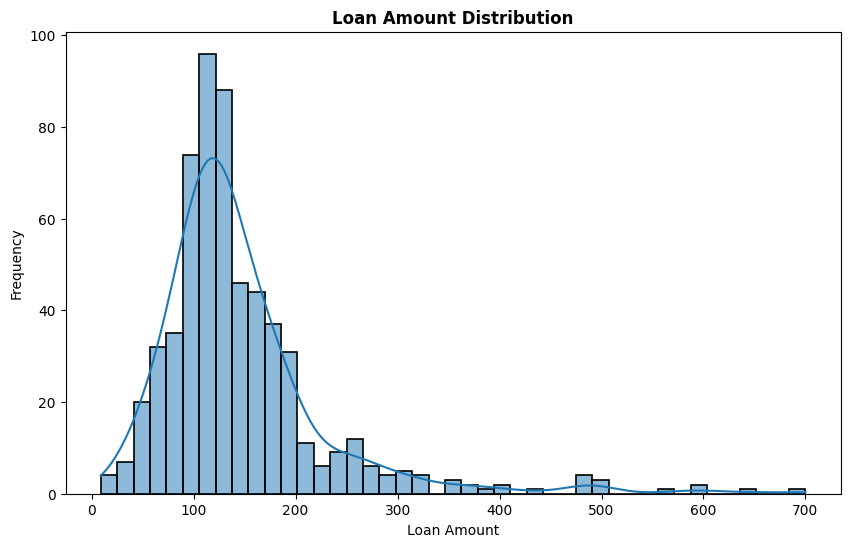

In [43]:

plt.figure(figsize=(10, 6))
sns.histplot(data=train, x="LoanAmount", kde=True,edgecolor='black', linewidth=1.2)

plt.title("Loan Amount Distribution",weight='bold')
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()